# TRABAJO GRUPAL 1: R

### Lectura de la data

In [1]:
base_raw <- read.csv(file = "../../data/base0.csv")
head(base_raw)

,X,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,10,9.615385,2.263364,1,0,0,0,1,0,0,...,0,1,7,0.49,0.343,0.2401,3600,11,8370,18
2,12,48.076923,3.872802,0,0,0,0,1,0,0,...,0,1,31,9.61,29.791,92.3521,3050,10,5070,9
3,15,11.057692,2.403126,0,0,1,0,0,0,0,...,0,1,18,3.24,5.832,10.4976,6260,19,770,4
4,18,13.942308,2.634928,1,0,0,0,0,1,0,...,0,1,25,6.25,15.625,39.0625,420,1,6990,12
5,19,28.846154,3.361977,1,0,0,0,1,0,0,...,0,1,22,4.84,10.648,23.4256,2015,6,9470,22
6,30,11.730769,2.462215,1,0,0,0,1,0,0,...,0,1,1,0.01,0.001,0.0001,1650,5,7460,14


In [2]:
colnames(base_raw)

[1] "X"     "wage"  "lwage" "sex"   "shs"   "hsg"   "scl"   "clg"   "ad"   
[10] "mw"    "so"    "we"    "ne"    "exp1"  "exp2"  "exp3"  "exp4"  "occ"  
[19] "occ2"  "ind"   "ind2"

In [3]:
#install.packages("dplyr")
library("dplyr")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
#base <- base_raw %>% rename(salario = wage, id = X, sexo = sex)
#head(base)

### 1.Partialling out

In [5]:
base1 <- base_raw %>% filter(scl==1 | clg==1)
head(base1)

,X,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,10,9.615385,2.263364,1,0,0,0,1,0,0,...,0,1,7.0,0.4900,0.343000,0.24010000,3600,11,8370,18
2,12,48.076923,3.872802,0,0,0,0,1,0,0,...,0,1,31.0,9.6100,29.791000,92.35210000,3050,10,5070,9
3,19,28.846154,3.361977,1,0,0,0,1,0,0,...,0,1,22.0,4.8400,10.648000,23.42560000,2015,6,9470,22
4,30,11.730769,2.462215,1,0,0,0,1,0,0,...,0,1,1.0,0.0100,0.001000,0.00010000,1650,5,7460,14
5,71,19.230769,2.956512,1,0,0,0,1,0,0,...,0,1,4.0,0.1600,0.064000,0.02560000,3255,10,8190,18
6,84,12.019231,2.486508,1,0,0,1,0,0,0,...,0,1,5.5,0.3025,0.166375,0.09150625,3600,11,8270,18


In [6]:
library("sandwich")

OLS

In [7]:
# Ols regression with controls

flex <- lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)

#   Note that ()*() operation in formula objects in R creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we) +  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  This is not intuitive at all, but that's what it does.

control.fit <- lm(flex, data=base1)
control.est <- summary(control.fit)$coef[2,1]

summary(control.fit)

cat("Coefficient for OLS with controls", control.est)

HCV.coefs <- vcovHC(control.fit, type = 'HC');
control.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

# confidence interval
confint(control.fit)[2,]


Call:
lm(formula = flex, data = base1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7697 -0.3120 -0.0132  0.2886  3.1704 

Coefficients: (15 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4578012  0.1457967  23.717  < 2e-16 ***
sex         -0.0860283  0.0183970  -4.676 3.05e-06 ***
exp1         0.0080335  0.0551048   0.146   0.8841    
exp2        -0.0629672  0.5930656  -0.106   0.9155    
exp3         0.0525203  0.2323876   0.226   0.8212    
exp4        -0.0097220  0.0297607  -0.327   0.7439    
shs                 NA         NA      NA       NA    
hsg                 NA         NA      NA       NA    
scl         -0.2409153  0.1199352  -2.009   0.0447 *  
clg                 NA         NA      NA       NA    
occ2        -0.0287321  0.0060816  -4.724 2.41e-06 ***
ind2        -0.0169001  0.0079423  -2.128   0.0334 *  
mw           0.1806319  0.1075136   1.680   0.0930 .  
so          -0.0033518  0.1039453  -0.0

Coefficient for OLS with controls -0.08602831

2.5 %      97.5 % 
-0.12210016 -0.04995646

OLS with partialling out

In [8]:
#OLS
#modelos
flex.y <- lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we) # model for Y
flex.d <- sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we) # model for D

# partialling-out the linear effect of W from Y
t.Y <- lm(flex.y, data=base1)$res
# partialling-out the linear effect of W from D
t.D <- lm(flex.d, data=base1)$res

# regression of Y on D after partialling-out the effect of W
partial.fit1 <- lm(t.Y~t.D)
partial.est1 <- summary(partial.fit1)$coef[2,1]

summary(partial.fit1)

cat("Coefficient for D via partialling-out", partial.est1)

# standard error
HCV.coefs1 <- vcovHC(partial.fit1, type = 'HC')
partial.se1 <- sqrt(diag(HCV.coefs1))[2]

# confidence interval
confint(partial.fit1)[2,]


Call:
lm(formula = t.Y ~ t.D)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7697 -0.3120 -0.0132  0.2886  3.1704 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.524e-18  8.880e-03   0.000        1    
t.D         -8.603e-02  1.829e-02  -4.702 2.69e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4918 on 3066 degrees of freedom
Multiple R-squared:  0.00716,	Adjusted R-squared:  0.006837 
F-statistic: 22.11 on 1 and 3066 DF,  p-value: 2.685e-06


Coefficient for D via partialling-out -0.08602831

2.5 %      97.5 % 
-0.12189944 -0.05015719

If we compare the two results, partialling out approach generates statistical power gain through a less standard error of sex and a higher p-value.

### 2.Graficas descriptivas

In [9]:
#install.packages("ggplot2")
library("ggplot2")

In [10]:
#install.packages("expss")
library("expss")

Loading required package: maditr


To get total summary skip 'by' argument: take_all(mtcars, mean)



Attaching package: 'maditr'


The following objects are masked from 'package:dplyr':

    between, coalesce, first, last



Attaching package: 'expss'


The following object is masked from 'package:ggplot2':

    vars


The following objects are masked from 'package:dplyr':

    compute, contains, na_if, recode, vars




In [11]:
head(base_raw)

,X,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,10,9.615385,2.263364,1,0,0,0,1,0,0,...,0,1,7,0.49,0.343,0.2401,3600,11,8370,18
2,12,48.076923,3.872802,0,0,0,0,1,0,0,...,0,1,31,9.61,29.791,92.3521,3050,10,5070,9
3,15,11.057692,2.403126,0,0,1,0,0,0,0,...,0,1,18,3.24,5.832,10.4976,6260,19,770,4
4,18,13.942308,2.634928,1,0,0,0,0,1,0,...,0,1,25,6.25,15.625,39.0625,420,1,6990,12
5,19,28.846154,3.361977,1,0,0,0,1,0,0,...,0,1,22,4.84,10.648,23.4256,2015,6,9470,22
6,30,11.730769,2.462215,1,0,0,0,1,0,0,...,0,1,1,0.01,0.001,0.0001,1650,5,7460,14


In [12]:
base2 <- base_raw
base2 <- apply_labels(base2,
                      wage = "Hourly wage",
                      lwage = "Log hournly wage",
                      sex = "Gender",
                      sex = c("Female" = 1,
                              "Male" = 0),
                      occ = "Occupational Classification",
                      ind = "Industry Classification",
                      shs = "Some high school",
                      hsg = "High school",
                      scl = "Some college",
                      clg = "College graduate",
                      ad = "Advanced degree",
                      ne = "Northeast",
                      mw = "Midwest",
                      so = "South",
                      we = "West",
                      exp1 = "Experience"
                     )
head(base2)

,X,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<int>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,...,<labelled>,<labelled>,<labelled>,<dbl>,<dbl>,<dbl>,<labelled>,<int>,<labelled>,<int>
1,10,9.615385,2.263364,1,0,0,0,1,0,0,...,0,1,7,0.49,0.343,0.2401,3600,11,8370,18
2,12,48.076923,3.872802,0,0,0,0,1,0,0,...,0,1,31,9.61,29.791,92.3521,3050,10,5070,9
3,15,11.057692,2.403126,0,0,1,0,0,0,0,...,0,1,18,3.24,5.832,10.4976,6260,19,770,4
4,18,13.942308,2.634928,1,0,0,0,0,1,0,...,0,1,25,6.25,15.625,39.0625,420,1,6990,12
5,19,28.846154,3.361977,1,0,0,0,1,0,0,...,0,1,22,4.84,10.648,23.4256,2015,6,9470,22
6,30,11.730769,2.462215,1,0,0,0,1,0,0,...,0,1,1,0.01,0.001,0.0001,1650,5,7460,14


In [13]:
#Agrupamos las zonas en una sola variable
base2$zone <- 0
m <- c("ne","mw","so","we")

for (i in c(1:4)){
    a <- match(m[i],colnames(base2))
    for (j in 1:length(base2$zone)){
        if (base2[j,a]==1){
            base2$zone[j] <- i
        }
    } 
    }

#Agrupamos nivel de estudio en una sola variable
base2$study <- 0
n <- c("shs","hsg","scl","clg","ad")

for (i in c(1:5)){
    a <- match(n[i],colnames(base2))
    for (j in 1:length(base2$study)){
        if (base2[j,a]==1){
            base2$study[j] <- i
        }
    } 
    }

#Aplicamos labels a las nuevas variables
base2 <- apply_labels(base2,
                      zone = "Zone",
                      zone = c("Northeast" = 1,
                               "Midwest" = 2,
                               "South" = 3,
                               "West" = 4),
                      study = "Level of education",
                      study = c("Some high school" = 1,
                                "High school" = 2,
                                "Some college" = 3,
                                "College graduate" = 4,
                                "Advanced degree" = 5))
head(base2)
                      

,X,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,zone,study
,<int>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,...,<labelled>,<dbl>,<dbl>,<dbl>,<labelled>,<int>,<labelled>,<int>,<labelled>,<labelled>
1,10,9.615385,2.263364,1,0,0,0,1,0,0,...,7,0.49,0.343,0.2401,3600,11,8370,18,1,4
2,12,48.076923,3.872802,0,0,0,0,1,0,0,...,31,9.61,29.791,92.3521,3050,10,5070,9,1,4
3,15,11.057692,2.403126,0,0,1,0,0,0,0,...,18,3.24,5.832,10.4976,6260,19,770,4,1,2
4,18,13.942308,2.634928,1,0,0,0,0,1,0,...,25,6.25,15.625,39.0625,420,1,6990,12,1,5
5,19,28.846154,3.361977,1,0,0,0,1,0,0,...,22,4.84,10.648,23.4256,2015,6,9470,22,1,4
6,30,11.730769,2.462215,1,0,0,0,1,0,0,...,1,0.01,0.001,0.0001,1650,5,7460,14,1,4


In [14]:
base2$sex <- factor(base2$sex)
base2$zone <- factor(base2$zone)
base2$study <- factor(base2$study)
head(base2)

,X,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,zone,study
,<int>,<labelled>,<labelled>,<fct>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,...,<labelled>,<dbl>,<dbl>,<dbl>,<labelled>,<int>,<labelled>,<int>,<fct>,<fct>
1,10,9.615385,2.263364,Female,0,0,0,1,0,0,...,7,0.49,0.343,0.2401,3600,11,8370,18,Northeast,College graduate
2,12,48.076923,3.872802,Male,0,0,0,1,0,0,...,31,9.61,29.791,92.3521,3050,10,5070,9,Northeast,College graduate
3,15,11.057692,2.403126,Male,0,1,0,0,0,0,...,18,3.24,5.832,10.4976,6260,19,770,4,Northeast,High school
4,18,13.942308,2.634928,Female,0,0,0,0,1,0,...,25,6.25,15.625,39.0625,420,1,6990,12,Northeast,Advanced degree
5,19,28.846154,3.361977,Female,0,0,0,1,0,0,...,22,4.84,10.648,23.4256,2015,6,9470,22,Northeast,College graduate
6,30,11.730769,2.462215,Female,0,0,0,1,0,0,...,1,0.01,0.001,0.0001,1650,5,7460,14,Northeast,College graduate


In [15]:
use_labels(base2,table(zone,sex))

           sex
zone        Male Female
  Northeast  635    538
  Midwest    741    596
  South      853    674
  West       632    481

In [16]:
use_labels(base2,table(study,sex))

                  sex
study              Male Female
  Some high school   91     29
  High school       842    414
  Some college      782    650
  College graduate  841    795
  Advanced degree   305    401

In [17]:
use_labels(base2,table(study, zone))

                  zone
study              Northeast Midwest South West
  Some high school        18      32    41   29
  High school            290     362   360  244
  Some college           267     438   404  323
  College graduate       428     378   473  357
  Advanced degree        170     127   249  160

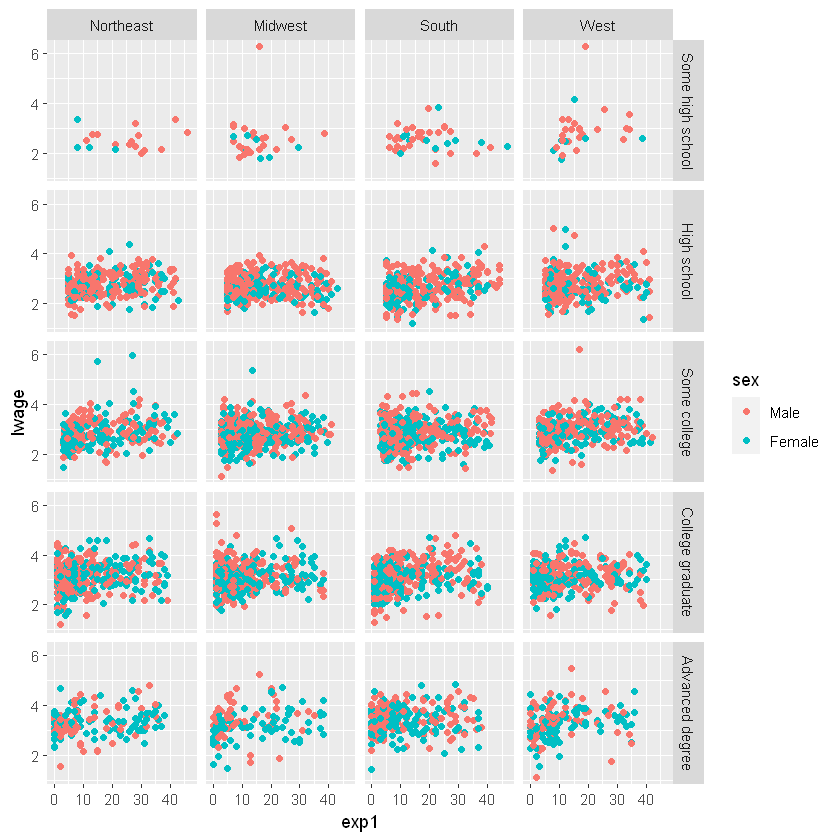

In [18]:
ggplot(base2, aes(x=exp1,y=lwage)) +
geom_point(aes(color=sex)) +
facet_grid(factor(study) ~ factor(zone))

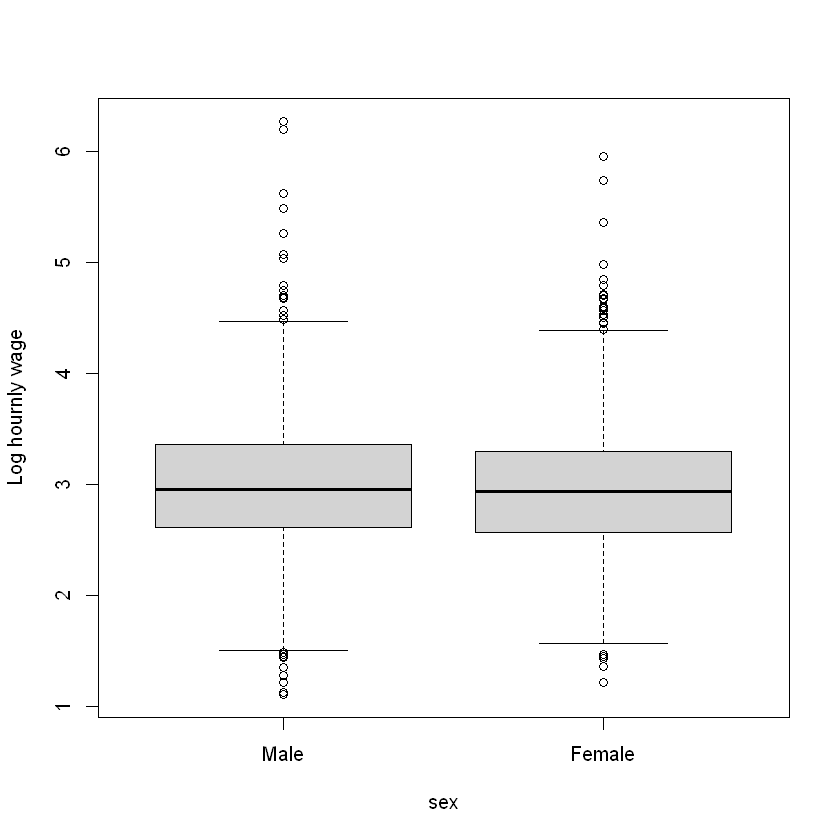

In [19]:
use_labels(base2, boxplot(lwage ~ sex))

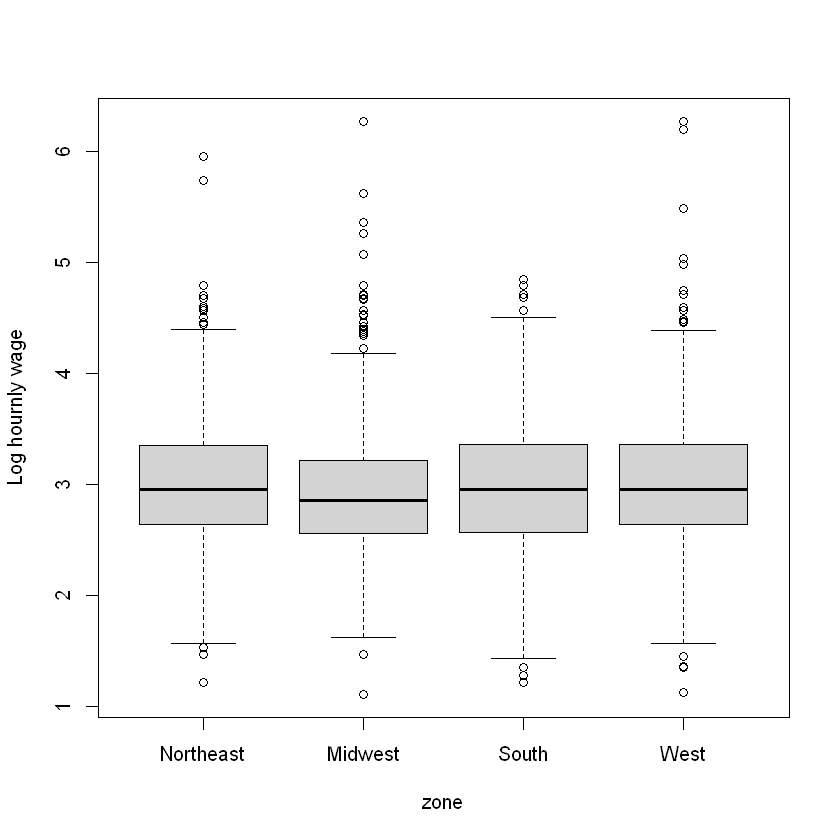

In [20]:
use_labels(base2, boxplot(lwage ~ zone))

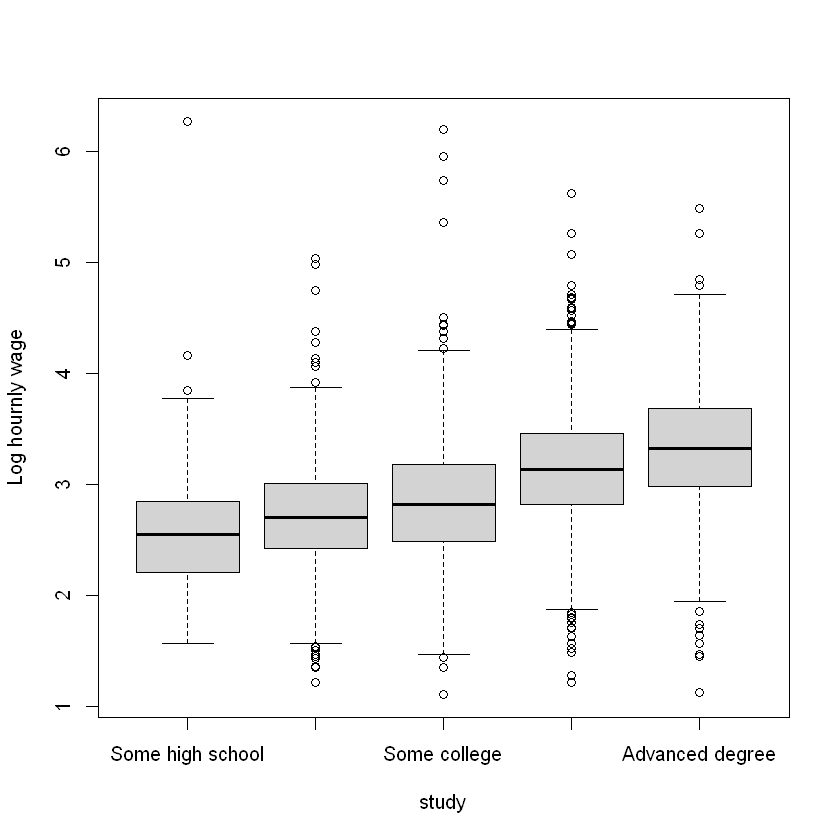

In [21]:
use_labels(base2, boxplot(lwage ~ study))

### 3.Replicacion de grafica

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



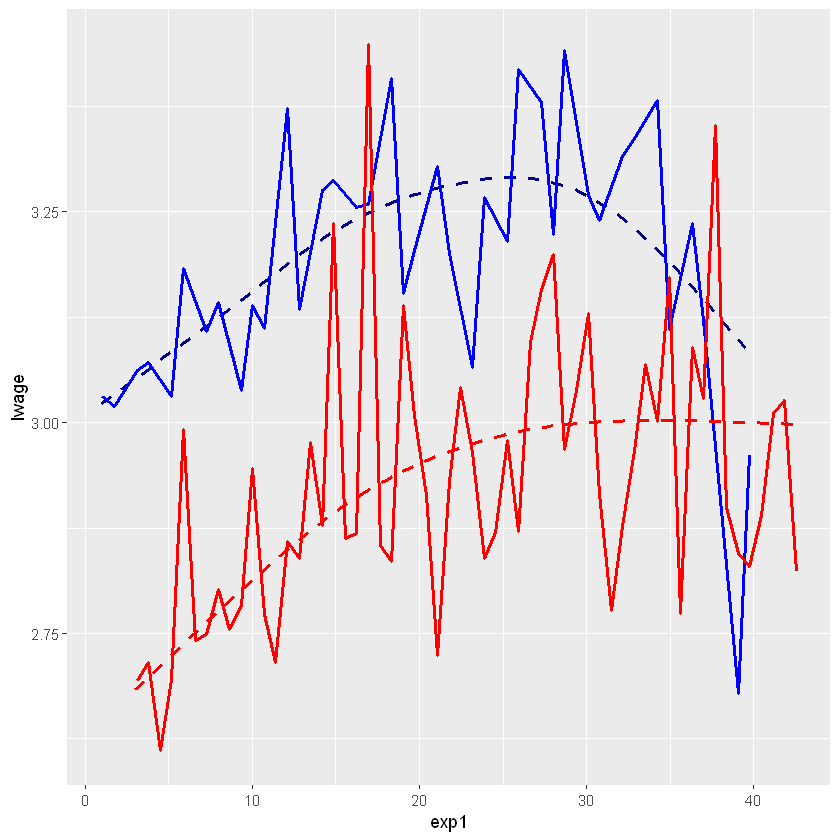

In [22]:
somcol = base_raw[base_raw$scl==1,]
col = base_raw[base_raw$clg==1,]

ggplot(NULL,aes(exp1,lwage)) +
    geom_smooth( data=col,  fill="blue",colour="darkblue", size=1,se=FALSE,linetype = "dashed") + 
    stat_summary_bin(data=col, fun='mean', bins=60,color='blue', size=1, geom='line') +
    geom_smooth( data=somcol, fill="red",colour="red", size=1,se=FALSE,linetype = "dashed") +
    stat_summary_bin(data=somcol, fun='mean', bins=60,color='red', size=1, geom='line')

### 4. Intervalos de confianza

In [23]:
#install.packages("arm")
#install.packages("MASS")
#install.packages("lme4")
library("MASS")
library("lme4")
library("arm")


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: Matrix


Attaching package: 'lme4'


The following object is masked from 'package:expss':

    dummy



arm (Version 1.12-2, built: 2021-10-15)


Working directory is C:/Users/Esteban/Documents/GitHub/ECO224/Labs/replication_1




In [24]:
fm1 <- glm(flex,data=base_raw) #Data completa
fm2 <-glm(flex.y,data=base_raw) #Partialling out 1: without "sex"
fm3 <-glm(flex.d,data=base_raw) #Partialling out 2: just "sex"
fm4 <-glm(flex,data=base1) #Data: Some College & College

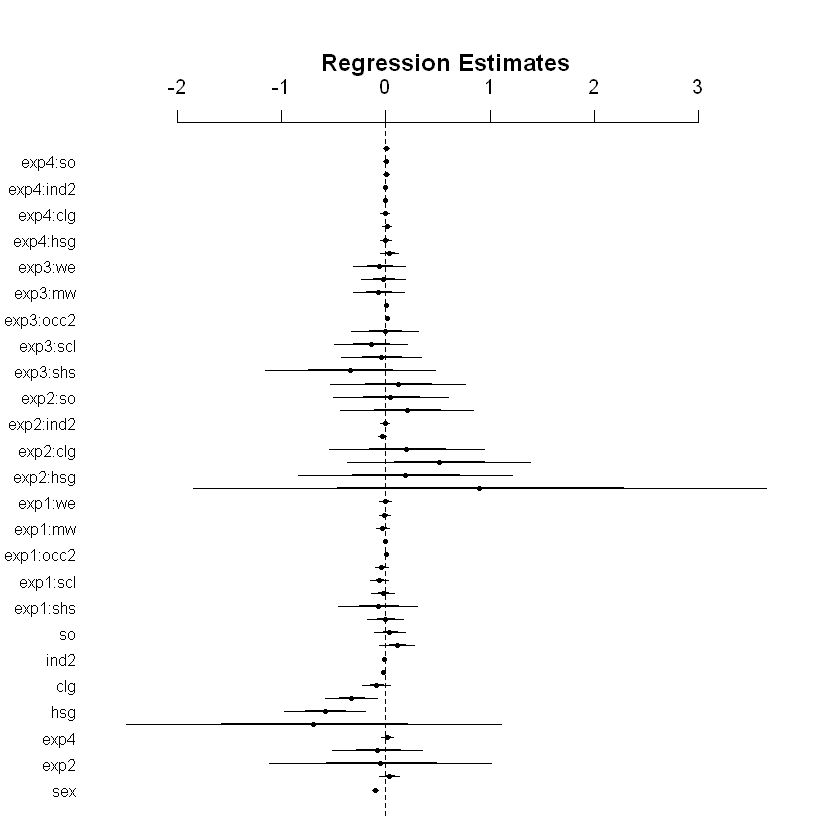

In [26]:
#Data completa
coefplot(fm1)

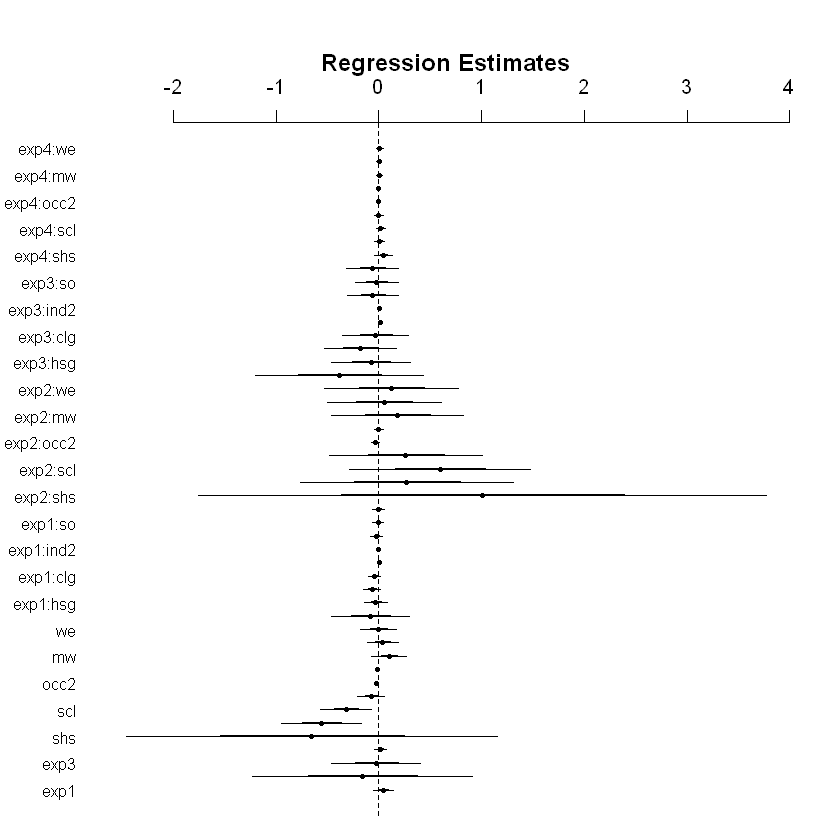

In [27]:
#Partialling out 1: evaluated in "lwage" without "sex"
coefplot(fm2)

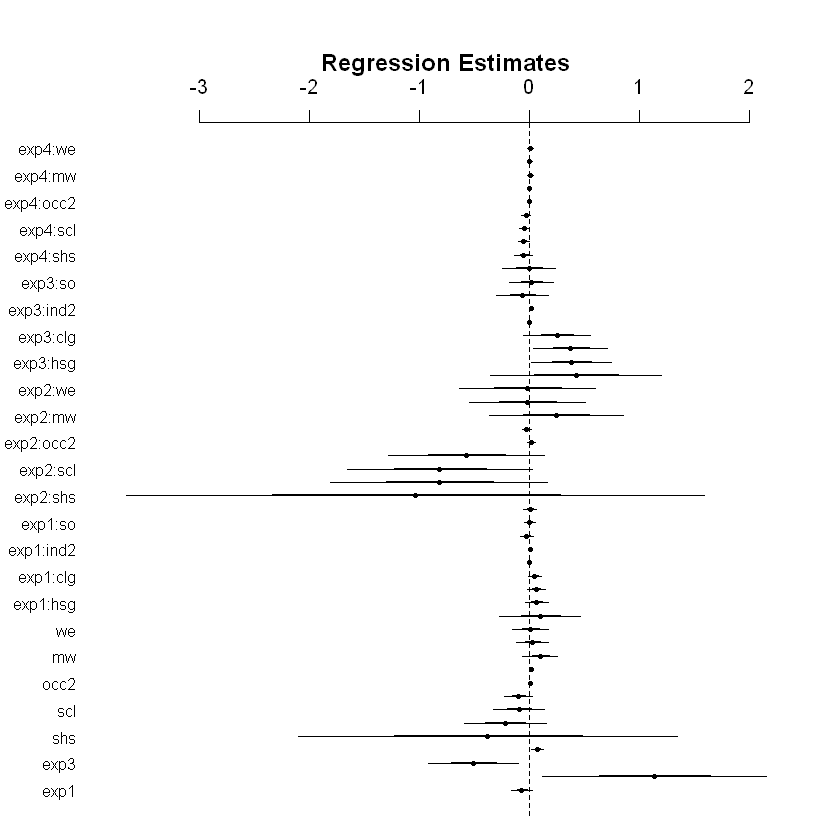

In [29]:
#Partialling out 2: evaluated "sex"
coefplot(fm3)

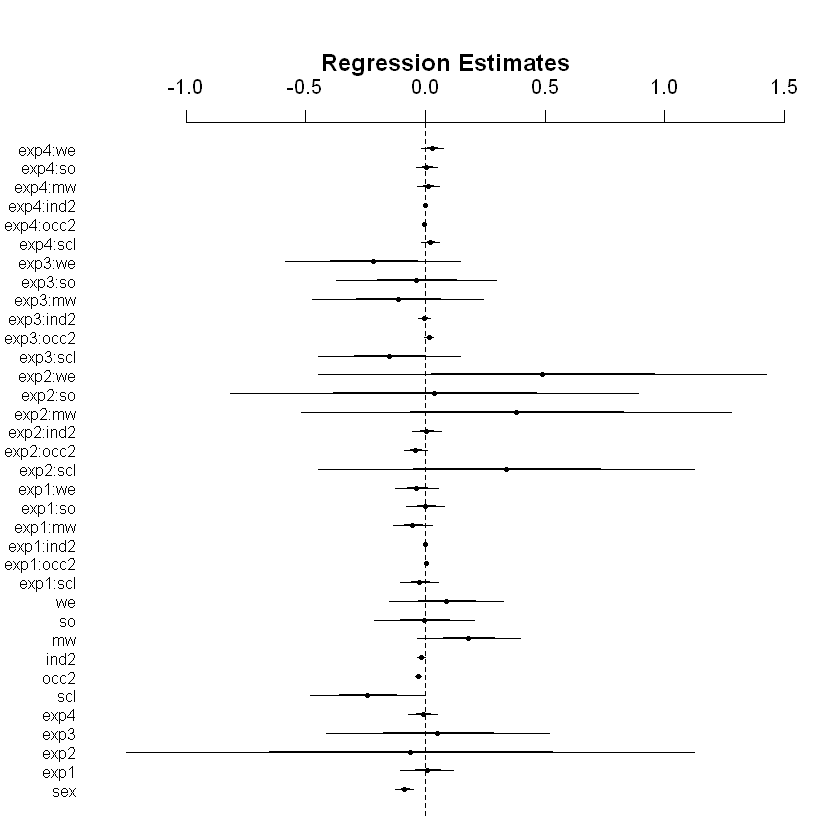

In [28]:
#Data: Some College & College
coefplot(fm4)

### 5. Frisch-Waugh-Lovell Theorem

We got the model as:

$$Y = D{\beta_1} + W{\beta_2} +e$$

where $\beta_1$ is the coefficient of interest.

Using the Frisch-Waugh-Lovell Theorem it is possible to obtain the estimator for $\beta_1$, by a partialling-out regression model as:

$$Y = {\gamma_{YW}}W  +{e_1}$$
$$D = {\gamma_{DW}}W  +{e_2}$$

After aplly a OLS regression, we get the residual error from both models and obtain the residual matrix:

$$\hat{e_1} = Y - W{\gamma_{YW}} $$
$$ = Y - W(W'W)^{-1} W'Y $$
$$ = (I -  W(W'W)^{-1} W') Y $$
$$ = MY $$

$$\hat{e_2} = D - W{\gamma_{DW}} $$
$$ = D - W(W'W)^{-1} W'D $$
$$ = (I -  W(W'W)^{-1} W') D $$
$$ = MD $$

Where $M$ is a idempotent matrix, regress the residuals to obtain $\beta_1$ :
$$\hat{e_1} = \hat{e_2} + B_{\hat{e_1}\hat{e_2}} + e_3$$

Then: 
$$B_{\hat{e_1}\hat{e_2}} = \beta_1$$